https://habr.com/ru/company/simbirsoft/blog/539508/ 

План:
1) Токенизация +

2) Удаление стоп-слов +

3) Чистка текстов +

4) Лемматизация и стемминг +

5) Векторизация +

6) Обучение на разных алгоритмах

7) Сравнение алгоритмов

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB 
from sklearn.svm import LinearSVC

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='pastel', 
        font='sans-serif', font_scale=1, color_codes=False, rc=None)

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\misha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\misha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\misha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
train_data = pd.read_csv('twitter_training.csv').drop('2401', axis=1)
test_data = pd.read_csv('twitter_validation.csv')
train_data.columns = ['Company', 'Reaction', 'Comment']
train_data

Company  Reaction  \
0      Borderlands  Positive   
1      Borderlands  Positive   
2      Borderlands  Positive   
3      Borderlands  Positive   
4      Borderlands  Positive   
...            ...       ...   
74676       Nvidia  Positive   
74677       Nvidia  Positive   
74678       Nvidia  Positive   
74679       Nvidia  Positive   
74680       Nvidia  Positive   

                                                 Comment  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window partition is ...  
74678  Just realized the windows partition of my Mac ...  
74679  Just realized between the windows partition of...  
74680  Just like the windows partition of my Mac is l...  

[74681 rows x 3 columns]

In [3]:
train_data.groupby(by='Reaction').Company.count()

Reaction
Irrelevant    12990
Negative      22542
Neutral       18318
Positive      20831
Name: Company, dtype: int64

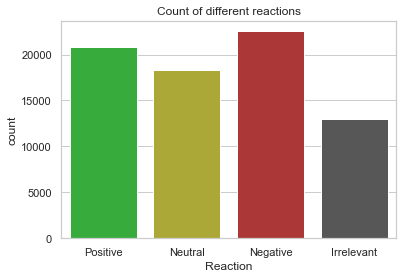

In [4]:
sns.countplot(x='Reaction', data=train_data, palette=['#24bf2a', '#bfba24', '#bf2424', '#575757']).set_title('Count of different reactions')
plt.show()

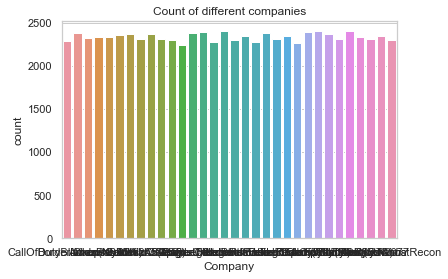

In [5]:
# Нужно спрятать описание оси ox 
sns.countplot(x='Company', data=train_data).set_title('Count of different companies')
plt.show()

In [6]:
train_data = train_data[train_data['Reaction'] != 'Irrelevant']
train_data.dropna(inplace=True)
train_data = train_data.reset_index(drop=True)

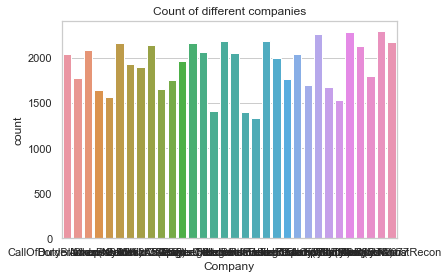

In [7]:
sns.countplot(x='Company', data=train_data).set_title('Count of different companies')
plt.show()

### Обработка текста

In [8]:
# Токенизация (разделение на массив слов), лемматизация (приведение к начальной форме) и удаление стоп-слов
stop_list = stopwords.words('english')
rubbish = ['im', "re", "ve", "m", "ca nt", "ll", "s", "d"]
punkt = ['.', ',', '/', '`', '"', "'", '!', '&', '?', '(', ')', '-', '+', '_', '*', '@', ';', ':', '<',
         '>', '\\', '[', ']', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '“', '„', '%', '$', '…',
         '’', '|', '^', '~', '=', '»', '”', '′', '•']
signs = ['ooo', 'sss', '🤣🤣🤣', 'iii', '🥺🥺🥺']
for i in rubbish:
    stop_list.append(i)
for i in range(len(train_data)):
    rubbish = train_data['Comment'][i]
    for j in punkt:
        rubbish = rubbish.replace(j, ' ')
    rubbish = word_tokenize(rubbish.lower())
    rubbish = [WordNetLemmatizer().lemmatize(word) for word in rubbish]
    rubbish = [PorterStemmer().stem(word) for word in rubbish]
    train_data['Comment'][i] = [word for word in rubbish if not word in stop_list]

In [9]:
for i in range(len(train_data['Comment'])):
    s = ''
    for j in train_data['Comment'][i]:
        s += f' {j}'
    train_data['Comment'][i] = s
train_data = train_data[train_data['Comment'] != '']
train_data = train_data.reset_index(drop=True)
for i in range(len(train_data['Comment'])):
    print(i, train_data['Comment'][i])

0  come border kill
1  get borderland kill
2  come borderland murder
3  get borderland murder
4  get borderland murder
5  spent hour make someth fun know huge borderland fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pic twitter com mlsi wf jg
6  spent coupl hour someth fun know huge borderland fan maya one favorit charact decid make wallpap pc origin pictur compar creation made fun pic twitter com mlsi wf jg
7  spent hour someth fun know huge borderland fan maya one favorit charact
8  spent hour make someth fun know huge rhandlerr fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pic twitter com mlsi wf jg
9  spent hour make someth fun know huge rhandlerr fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pic twitter com mlsi wf jg
10  wa
11  rock hard la varlop rare power handsom jackpot borderland xbox dlvr rmtrgf
12  rock hard la varlop rare power handsom jackpot b

1242  stuck borderland batman arkham knight befor crazi game novemb look forward happen game memor moment happen man gambl terribl
1243  gon na get lost borderland batman dark knight bit befor game crazi commenc novemb look forward come game includ memor moment go occur game friggin awesom
1244  wa gon na get peopl stuck game borderland batman arkham knight bit befor game crazi commenc mid novemb look forward chang come game memor moment realli go occur man game friggin awesom
1245  gon na get stuck game x arkham citi bit befor game crazi happen novemb back come futur game memor moment go occur man game friggin awesom
1246  person best
1247  best
1248  man best
1249  person best
1250  person alway best
1251  person best
1252  look love borderland death want know moron gearbox design maliwan circl slaughter heavi badass trooper singl wave kid
1253  see love borderland death want know moron gearbox designet maliwan circl slaughter heaven bathroop wave
1254  look love borderland death wan

1960  prosynd dude thi suck comput run slower hi sack potato well guess onli realli play chess hous
1961  prosynd dude thi suck comput system run slower better sack dumb potato well guess also onli realli play borderland p
1962  prosynd dude thi suck player run slower coupl potato well guess still onli realli play thi p
1963  duvalmag whi tf onli free krieg releas plz someon gearboxoffici someon borderland plz help figur thi drive insan
1964  duvalmag whi tf free war releas plz someon gearboxoffici help someon borderland plz figur thi drive insan
1965  duvalmag whi tf onli free hebbl releas plz someon gearboxoffici someon borderland plz help figur thi drive insan
1966  duvalmag whi tf onli free krieg releas plz pleas fuck hand someon gearboxoffici plz help figur thi drive u insan
1967  whi duvalmag whi e tf onli simpli free krieg otherwis releas plz someon gearboxoffici someon borderland plz help still figur thi obvious drive toward insan
1968  duvalmag whi tf onli free john releas plz

3210  yike decid pay play consol mr fuck man
3211  yike pay play consol fuck man
3212  holi fuck shit ye
3213  holi shit ye
3214  holi fuck shit ye
3215  holi holi shit ye
3216  holi fuck jesu shit oh ye
3217  holi fuck shit
3218  thi look realli cool
3219  thi look realli cool
3220  look veri cool
3221  thi look kinda cool
3222  thi kid look realli cool
3223  thi way realli cool
3224  black op cold war stream ladi night wa busi due technic issu still play camera enjoy everi second thi much fun cod game sinc ww
3225  black op cold war stream ladi night wa veri busi due technic problem still play camera enjoy everi second much fun play cod sinc ww
3226  even ladi cold war wa busi due technic problem still play behind camera enjoy everi second
3227  black op cold war ladi night wa realli busi due technic issu still play camera enjoy everi second thi awesom fun cod game sinc ww
3228  global black op cold war stream ladi night wa busi due variou technic secur issu still much play camera re

4460  long blue line ha broken destroy us serpen u largest lo amazon com dp
4461  long blue line disrupt us richardson ak late vietnam lo amazon com dp
4462  entir long blue line becom disrupt us serpen later ak disappear next largest lo amazon com view dp
4463  long blue gun battl charli serpen ak attack battleship lo amazon com dp
4464  proud vex moron plan l manag amazon show product reclaim rsu l posit rather demonstr result rehir list becaus ye hard work evil ask ani l amazon
4465  proud irrit crazi plan l manag amazon show product reclaim rsu l posit instead show result list new hire becaus ye hard edit nasti ask ani l amazon
4466  proud list hire becaus ye work hard evil ask ani l amazon
4467  proud consid vex moron plan l manag amazon show product reclaim rsu l posit rather therefor demonstr result rehir list becaus ye hard work evil ani supervisor amazon
4468  proud vex moron plan independ l manag amazon manag show product reclaim rsu excel l posit rather demonstr better resul

5710  first time eu commiss ha taken step
5711  time despit fact current million peopl live poverti line access health servic access health care access health care
5712  best thing thi amazon documentari show levi go hi transfer busi show world penni pincher realli
5713  best thi amazon documentari show levi run hi transfer busi show world penni pincher realli
5714  best thi amazon documentari show levi run hi transfer busi show world penni pincher realli
5715  best thing thi amazon documentari show levi got hi transfer busi show hi world penni pincher jone realli
5716  next best thing thi true amazon documentari actual show levi go hi wealth transfer busi show world onli penni pincher realli
5717  absolut best thing thi amazon documentari show levi go hi transfer game world penni pincher realli becom
5718  anyon ha read enjoy book one u ha go feel abl rate review goodread amazon would soooooo grate goodread com book show http co xuhpk mogo
5719  anyon ha read enjoy book one u ha go fe

6959  disappoint overwatch ani owl theme race game like expans mode fight team fan point sinc team skin alway
6960  also disappoint well overwatch even almost ani owl theme event game like arcad mode fight team fan experi point team skin alway
6961  weird overwatch enabl anymor owl theme event game pure offlin mode fight team fan point team skin alway
6962  kill playoverwatch ‘ fault fuck
6963  kill playoverwatch
6964  kill playoverwatch fault fuck
6965  kill isi playoverwatch ‘ fault fuck
6966  kill playoverwatch ‘ fault fuck
6967  playoverwatch fault fuck
6968  whi playoverwatch make season placement cap sr kinda shot gm top player rip harbleuow
6969  whi playoverwatch set season placement cap sr
6970  whi playoverwatch make season cement cap sr
6971  whi make round placement cap sr kinda shot year gm top player rip playoverwatch
6972  whi playoverwatch first make final season placement cap sr kinda shot high gm top player could rip harbleuow
6973  whi playoverwatch make grade placem

8291  xbox seri x sale fail phil avoid blame
8292  xbox seri x sale plummet blame
8293  wait thi kinda hype
8294  wait thi hype
8295  wait
8296  wait thi big hype
8297  wait thi kinda hype
8298  wait kinda hype
8299  honestli shit show wa xbox one x pre releas news cycl seri x still good name honestli set earn back lot good faith carri earli lifespan
8300  frankli shit show wa pre releas cycl xbox one x seri x still good name honestli line earn back lot good faith carri around dure earli lifespan
8301  frankli crap show wa xbox one x pre releas news cycl x seri still veri good titl honestli set earn lot goodwil carri throughout earli life
8302  honestli everyth shit show wa xbox edit x pre releas news cycl nobl seri still good name honestli set themselv earn back lot good press carri earli lifespan
8303  honestli long shit show wa xbox one x pre releas news run cycl seri x still good new name honestli set one earn back lot real good work faith carri earli lifespan
8304  honestli everyt

9670  rt would go goat larri bird
9671  would go
9672  rt go goat larri
9673  rt go goat larri bird
9674  rt go goat larri bird
9675  wit john stockton hand tomahawk revers slam fast break myteam game becaus got takeov badg thi game done turn real life basketbal complet nonsens thi game feel like someth play cici pizza🤦‍ nba k myteam
9676  saw john stockton two hand tomahawk revers slam fast break myteam game becaus got takeov badg thi game turn real basketbal complet nonsens thi game feel like someth play cici pizza nba k myteam
9677  wit john stockton hit two hand tomahawk fast break myteam game becaus got takeov sign
9678  unk wit john stockton hand tomahawk revers slam fast break myteam onli becaus wear takeov badg thi game done turn real life basketbal complet nonsens thi game play someth play pizza pizza🤦‍ nba k myteam
9679  wit john stockton full hand tomahawk revers slam straight fast break huge myteam game becaus got takeov badg thi game done help turn thi real life basketbal 

10959  get daili nba k lockercod blogspot com http co sf uwvzxav
10960  get daili nba k lockercod blogspot com http www co sf uwvzxav
10961  get unk nba k lockercod blogspot com http co sf uwvzxav
10962  time get back daili nba k lockercod blogspot da com http co sf uwvzxav
10963  unk nba k lockercod blogspot com
10964  nba k pleas chang lag loss deal lag loss
10965  nba k pleas chang delay loss cope delay loss
10966  n k pleas chang loss handl loss
10967  nba k pleas block lag loss alway deal lag loss
10968  nba k pleas chang lag loss tell deal lag avoid realli loss
10969  nba k pleas chang lag loss deal lag loss
10970  thi
10971  thi case
10972  thi time
10973  thi way
10974  start thi
10975  dont want park handl beluba beluba beluba beluba beluba beluba beluba beluba beluba beluba beluba beluba beluba beluba beluba ronni k nba k
10976  want park hold beluba beluba beluba beluba beluba beluba beluba beluba beluba beluba beluba ronni k nba k
10977  dont park handl beluba beluba beluba

12458  one best scene halo histori
12459  one best scene event dota histori
12460  one biggest scene dota histori
12461  cant even get lvl battl pa life unfair
12462  even get lvl fight pa life unfair
12463  even get combat pa life unfair
12464  cant even get season battl pa life unfair
12465  cant even get past lvl minu battl pa life unfair
12466  cant even get lvl hour pa life preciou
12467  happi admiralbulldog legendari day legendari ember player
12468  happi admiralbulldog legendari day legendari ember player
12469  happi admiralbulldog legendari day legendari ember player
12470  happi admiralbulldog legendari day legendari ember player sourc
12471  happi admiralbulldog rather legendari day legendari ember hockey player
12472  happi admiralbulldog strong recommend weekend ember player
12473  dota steam queue match accept found match game show reconnect abandon option noth happen tri reconnect min kick disabl matchmak 🤔
12474  dota steam queue match find match accept game show opti

13788  howev onli ever read p red piss
13789  hardli ever read p piss
13790  look cool af
13791  look cool
13792  look cool
13793  look cool unk
13794  look cool af
13795  look realli af
13796  know whi peopl hate think look dope 🤷‍
13797  know whi peopl hate think look stupid
13798  know whi peopl hate think look like dope
13799  know whi peopl hesit think look dope 🤷‍
13800  know whi peopl hate think look dope unk
13801  alreadi know whi peopl hate think might dope unk
13802  veri much look forward get new info
13803  veri much look forward receiv new inform
13804  look forward receiv new inform
13805  veri much come forward get new info
13806  veri much look forward get new info
13807  veri much look forward get info
13808  okay shit
13809  okay shit
13810  okay shit
13811  okay shit
13812  okay togeth shit
13813  say shit
13814  good luck pay dollar broke buggi incomplet game definit microtransact despit price
13815  good luck pay broken flaw incomplet game despit price definit mic

15208  warcraftdev warcraft r chang yet mongoos bite still necessarili default part surviv kit pleas make thi chang bloodi make sens ever pick talent sign life row
15209  warcraftdev warcraft chang yet mongoos bite still default method surviv kit whi make thi chang answer ani put pick talent third row
15210  cuti check screenshot world
15211  sweet guy check screenshot world
15212  какая милашка
15213  cuti check anoth screenshot world
15214  need cuti check screenshot world day
15215  cuti unk unk check screenshot world
15216  want check enough money bank account guiltlessli purchas world warcraft realli said sorri luv onlin bank shedul mainten x
15217  want check enough money bank account buy world warcraft fault realli said
15218  want check enough money bank account guiltless purchas world warcraft realli said sorri luv onlin bank schedul mainten x
15219  want check enough money bank account guiltlessli purchas packet board game realli said sorri luv onlin bank shedul mainten
15220

16688  warcraft iii reforg launch disast fan revolt poor graphic disq u lpelw
16689  warcraft iii reform launch disast fan revolt poor graphic disq u lpelw
16690  warcraft iii reforg disast rebel revolt poor graphic disq u lpelw
16691  warcraft univers iii reforg launch disast fan revolt america poor qualiti graphic disq u w lpelw
16692  iii reforg launch test get poor graphic detail u lpelw
16693  love world warcraft
16694  love world warcraft
16695  love world warcraft
16696  love world warcraft
16697  love world warcraft
16698  love battl warcraft
16699  goodnight folk thank great even dungeon run
16700  good night folk thank great even full dungeon run
16701  good luck thank beauti even jog danc
16702  goodnight gentleman thank great even dungeon run
16703  goodnight folk thank great even ahead dungeon run
16704  goodnight folk plan great even dungeon run
16705  never play world warcraft help twitch tv dxrkwxsp
16706  never play world warcraft help twitch tv dxrkwxsp
16707  never p

17957  unk
17958  meme much rager wa csgo well fuck valor bring back old memori
17959  rememb much anger wa csgo well damn valor bring back old memori
17960  meme much rager wa csgo well fuck valiant bring back old memori
17961  meme much sex rager wa csgo well fuck valor bring back old memori
17962  meme much red rager wa csgo well fuck valor bring back great old memori
17963  meme much bad wa csgo well thi valor bring hi old shit
17964  final csgo cringi commentari bad gameplay channel youtu zkuvkmpsfc via youtub
17965  final csgo cryptic comment poor gameplay channel youtu zkuvkmpsfc via youtub
17966  final csgo cringeworthi comment bad gameplay channel youtu zvkmpsfc via youtub
17967  final csgo bad commentari bad gameplay channel youtu zkuvkmpsfc via bbc
17968  final csgo cringi commentari game bad gameplay histori channel youtu zkuvkmpsfc wa via youtub
17969  final csgo realli terribl commentari bad grammar pleas youtu zkuvkmpsfc via youtub
17970  crazi game year old expand black

19406  amaz googl free still know word mean
19407  amaz googl free u still know word mean
19408  amaz googl free still know word mean
19409  amaz googl free still realli know word mean
19410  amaz googl free still peopl know word mean
19411  still amaz googl free million still know word
19412  googl name horror aesthet mean hot pic twitter com p asnp jke
19413  googl name horror aesthet mean hot pic twitter com p asnp jke
19414  googl name horror aesthet mean hot pic facebook com p asnp jke
19415  googl name horror aesthet mean hot pic twitter com p asnp jke
19416  googl name horror aesthet mean hot pic twitter com p asnp jke
19417  applesupport bzamayo sure happen googl classroom review app store think spam
19418  applesupport bzamayo sure happen googl classroom app store think wa spam
19419  applesupport bzamayo sure happen review classroom app store think wa spam
19420  applesupport bzamayo sure happen googl classroom applic app store think android spam
19421  applesupport bzamayo s

20707  awesom bosslog unk
20708  awesom music bosslog realli
20709  awesom realli
20710  wow fuck defend comment think bitcoin got assassin creed blu ray blew cigarett
20711  wow fuck defend comment think bitcoin assassin creed blu ray blew cigarett
20712  wow fuck defend comment think bitcoin got assassin creed blu ray blew
20713  wow fuck defend comment think bitcoin went creed blu ray total blew cigarett
20714  wow fuck defend comment think drink bitcoin got assassin creed thi blu ray sometim blew cigarett
20715  wow fuck comment invest bitcoin got assassin creed ray cigarett
20716  wait
20717  wait
20718  wait
20719  sleep
20720  wait
20721  unk wait
20722  veri veri larg
20723  veri veri big
20724  veri big
20725  still veri larg
20726  veri veri larg
20727  veri veri larg
20728  last time ive truli happi wa assassin creed trailer drop
20729  last time wa realli happi wa trailer creed assassin wa drop
20730  last time wa realli happi wa creed movi trailer drop
20731  last time ive

22200  know get peopl aim pc
22201  know realli get peopl great aim pc
22202  know get peopl great aim
22203  bug like drive crazi set speed clip x playapex clip twitch tv amazingcrispyl
22204  bug like thi drive crazi set speed x playapex clip twitch tv amazingcrispyl
22205  mistak like thi drive crazi set speed x playapex clip tch tv amazingcrispyl
22206  bug like drive crazi set speed clip x rhandlerr clip twitch tv amazingcrispyl
22207  sourc bug like drive crazi set speed clip x rhandlerr clip twitch tv amazingcrispyl
22208  unk
22209  first time eu commiss ha taken step
22210  time despit fact current million peopl live poverti line access health servic access health care access health care
22211  playapex troubl connect lobbi connect lobbi
22212  playapex difficulti connect lobbi connect lobbi
22213  playapex lobbi connect lobbi connect problem
22214  playapex troubl connect lobbi connect facebook
22215  playapex troubl connect lobbi exit connect lobbi
22216  troubl connect mall

23456  stress stress stress
23457  stress fun fun
23458  stress stress debilit
23459  stress sometim stress stress
23460  pain stress stress
23461  playapex spooki season suck game short
23462  playapex spooki season suck game short
23463  playapex spoki season suck game short
23464  playapex spooki season suck game difficult
23465  playapex spooki season suck game hope fall short
23466  unk spooki season game short
23467  ohh pleas make wattson crypto friend agaiiiin line game make sad playapex
23468  ohh pleas make wattson crypto friend agaiiiin line stake make sad playapex
23469  pleas make wattson crypto friend line game make sad playapex
23470  ohh pleas make friend agaiiiin line game make sad playapex
23471  ohh pleas make wattson crypto friend agaiiiin line game make sad playapex
23472  ohh pleas man wattson crypto friend agaiiiin line game make peopl sad
23473  love map honey materi seem like scarc
23474  love card honey materi seem scarcer
23475  love map honey materi seem lik

24737  engag haka gambl amaz world leagu legend thursday thirst let slam command murica
24738  get hecka game via amaz world leagu legend thirsti thursday let slam command murica twitch tv shawain
24739  get hecka game via amaz world leagu legend thirsti thursday let slam command murica twitch tv shawain
24740  check video
24741  take look video
24742  watch video
24743  check new video
24744  check video
24745  check unk video
24746  leagu legend suck
24747  leagu legend suck
24748  leagu gentleman suck
24749  leagu legend unk
24750  leagu light legend suck
24751  leagu hockey legend suck
24752  way ur rank system work fuck atroci horrend disgust perplex baffl whi put gold rank bronz suppos climb go peopl arent rank leagueoflegend
24753  way rank system work damn atrozio horrend disgust perplex baffl whi gold rank bronz close peopl come rank leagueoflegend
24754  whi gold rank bronz support climb go peopl rank leagueoflegend
24755  way ur rank system work fuck atroci horrend disgust p

26118  freak insan thi got kill assist leagu say someth teamwork thi live twitch tv mishmann
26119  freak insan thi got kill assist leagu say someth teamwork thi live twitch tv mishmann
26120  unk
26121  kayn feel shame
26122  kayn feel asham
26123  kayn feel shame
26124  kayn feel great
26125  kayn feel shame
26126  kayn feel li
26127  happi happi monday tonight stream play leagu legend learn charact aram match wait see
26128  happi happi monday tonight stream play leagu legend learn charact aram game wait see
26129  happi happi monday tonight stream play leagu legend learn charact aram match wait see
26130  happi happi monday tonight stream play leagu legend learn charact aram hope see
26131  happi happi monday tonight realli home stream play leagu legend start learn charact aram match wait see
26132  happi happi monday tonight stream play leagu wolf v learn aram match wait see
26133  toxic af leagu legend idk question mark ping peopl funni
26134  toxic leagu legend idk question mark

27456  bennitegam wtf pic wikipedia org u xl gpd u
27457  rhandlerr wtf pic twitter com u xl gpd u
27458  l rhandlerr wtf pic twitter com u xl gpd u
27459  word thi appal even know mind blow fact appl remov fortnit store due lower cost v buck epic game make short cinemat explain situat
27460  word horror even know bother fact appl ha remov fortnit busi becaus cost v buck ha reduc epic game make short film explain situat
27461  word say even resent know inflat thought fact appl remov store becaus overpr v buck epic game make short film explain situat
27462  word thi pictur even know mind ed fact appl delet fortnit store due lower cost v buck epic game make short cinemat explain terribl situat
27463  word thi none appal even know n mind still blow fact wa appl ha remov fortnit store due lower cost side v buck epic game make short cinemat explain situat
27464  word thi appal even know anyon nose blow fact appl remov video store due lower cost v buck epic make short cinemat explain error
2

28720  github info blog npm
28721  github blog npm
28722  microsoft ad team look pretti fli first day back
28723  microsoft ad team look forward first day back
28724  team microsoft hell look pretti first day ago
28725  microsoft azur team look pretti fli first day back
28726  microsoft digit ad compani team look pretti fli back first day back
28727  microsoft ad team look pretti fli first month back
28728  microsoft troubl revel unvet chines contractor listen skype call secur rt com usa mic
28729  microsoft troubl reveal verifi chines contractor stop make skype call secur rt com usa mic
28730  microsoft troubl expos untest chines
28731  microsoft troubl revel chines contractor listen skype call rt com usa mic
28732  org microsoft major troubl revel regard unvet chines contractor listen skype call clear secur rt com usa mic
28733  microsoft unk troubl custom unvet contractor got skype call fals secur rt com usa mic
28734  phish attack target microsoft user netflix amazon lure darkread 

30186  small spell mage awesom valu ash outland hearthston youtu kmbvee clm via youtub
30187  small spell mage valu ash blade hearthston youtu kmbvee clm q youtub
30188  small earth spell metal mage awesom valu angel ash ash outland hearthston go youtu kmbvee clm via youtub
30189  space mage awesom valu ash realiti video kmbvee clm youtub
30190  handsom reno save day twice hearthston daili moment ep gameforc jp hearthston e
30191  handsom reno save day twice hearthston daili moment ep gameforc jp hearthston e
30192  handsom reno save day twice hearthston daili moment ep gameforc jp heartston e
30193  handsom reno save box today unk hearthston daili moment ep gameforc jp hearthston e
30194  handsom reno save day twice hearthston daili moment ep gameforc jp hearthston e net
30195  handsom save day twice hearthston imag review jp hearthston e
30196  play bunch flamewak tavern brawl easi pack great open
30197  play flamewak tavern brawl easi pack great open
30198  play flamewak tabrawl lig

31455  holi shit arena suck call back dragon
31456  give away darkmoon fair standard pre purchas bundl thank blizzard includ → darkmoon pack → darkmoon legendari → nzoth card back → duel earli access enter follow like retweet winner pull nov st
31457  give away dunkmoon fair standard pre purchas bundl thank blizzard includ → darkmoon pack → darkmoon legendari → nzoth card back → duel earli access enter follow like retweet winner drawn novemb st
31458  includ → packet darkmoon → darkmoon legendari → nzoth card back → duel earli access enter follow like retweet investig nov st
31459  give away darkmoon fair standard pre purchas unlock thank blizzard includ darkmoon pack → darkmoon legendari → battl card box → duel earli access enter follow like write winner pull nov st
31460  give away darkmoon fair standard pre purchas bundl thank blizzard includ → center darkmoon pack → base darkmoon team legendari → nzoth card back → duel earli first access enter follow like befor retweet befor winner

32705  xbox u player consol – battlefield special edit bundl uzh ca http co xsqeplwv
32706  rip battlefield v
32707  rip battlefield v
32708  rip battlefield v
32709  rip battlefield
32710  rip battlefield v
32711  rip battlefield heart
32712  amazingli bad ye
32713  amazingli bad ye
32714  surprisingli bad ye
32715  amazingli simpl ye
32716  amazingli bad ye
32717  bad ye
32718  ea dice battlefield v multiplay ha major balanc issu even fun play anymor
32719  ea dice battlefield v multiplay ha big balanc problem even fun play anymor
32720  ea dice battlefield v multiplay ha seriou balanc problem
32721  ea dice battlefield v multiplay ha numer balanc issu even intuit play anymor
32722  ea dice battlefield v multiplay ha major balanc point issu suddenli quit even fun play anymor
32723  ea dice battlefield v multiplay encount incred balanc issu realli even fun play anymor
32724  war war never chang fallout soo mani u think thi would right passag great adventur let tell wa adventur battlef

34127  pubg gamer corrupt pubg gamer commit robberi pubg player attack pic player take bribe hundr case pend becaus pubg player legit pubg ban instead actual problem want pubg ban
34128  pubg gamer corrupt pubg gamer commit robberi pubg player attack pic pubg player actual take bribe million abus case pend becaus pubg player whi pubg game essenti ban entir instead actual problem total reject pubg ban
34129  pubg gamer corrupt pubg gamer commit robberi pubg player attack pic pubg player give reveng million case pend becaus pubg player whi pubg tie instead actual problem reject pubg peopl
34130  never play
34131  never play
34132  never play
34133  never play unk
34134  never play
34135  never lie
34136  play stream
34137  play stream
34138  play stream
34139  play produc
34140  definit play stream
34141  play
34142  pubg support bro pleas stop forc everyon play miramar feel like time map split shit evenli pleas
34143  pubg support bro pleas stop forc everyon play miramar feel like time 

35454  k u heck doe mobil metro pc de verizon de etc outag one america
35455  heck unk mobil metro pc verizon outag america
35456  call hear pleas enjoy thi verizon ringback tone parti reach follow beethoven go fuck
35457  need call say pleas enjoy thi verizon rington parti follow beethoven go fuck
35458  call hear pleas enjoy thi verizon call parti done follow beethoven go fuck
35459  conclus call hear pleas enjoy thi verizon ringback tone victori parti reach follow beethoven go fuck
35460  wish call someth hear pleas enjoy thi clear verizon ringback tone parti reach follow simpl beethoven go fuck
35461  fact call hear pleas use thi verizon ringback tone parti reach sound beethoven go fuck
35462  final told verizon fuck pay almost month year
35463  eventu verizon agre pay nearli month year
35464  final told verizon fuck pay nearli month year
35465  final told verizon fuck pay almost month around year
35466  final harri told verizon fuck pay almost given month year
35467  final told ve

36749  mighti team south arlington ha creat big messag tin man ha heart give hi instal rheem instantan water heater home depot great job team penn dsm samedaywh laroldan tammyrheemwat
36750  great team penn dsm samedaywh larol tammyrheemwat
36751  mighti team south africa creat special messag tin man life hi heart give instal rheem water heater home depot great job team penn dsm samedaywh laroldan tammyrheemwat
36752  mighti man team south arlington creat great messag big tin man got heart check back give take forehead instal rheem water heater home depot great job team penn dsm samedaywh laroldan tammyrheemwat
36753  mighti marvel south arlington creat great messag peter pan got heart go toward instal rheem air heater home depot great work team penn dsm h samedaywh laroldan
36754  go home depot wa fun miss go shop
36755  go home depot wa biggest fun
36756  go home depot wa fun miss shop
36757  go home depot wa enjoy miss go shop
36758  go home depot wa unexpect fun past miss go shop
3

38070  home depot loot dc peopl load car store nyc
38071  home depot dc loot peopl load car store nyc
38072  district columbia warehous full applianc loot peopl load car
38073  home depot also loot dc peopl keep load car store nyc
38074  home depot slowli loot dc peopl load car store northern nyc
38075  home depot ha loot manhattan peopl load car store nyc
38076  state tell safe go home depot danger go restaur state tell liquor store essenti church state tell danger go visit park golf fish swim go boat bewar 🤓
38077  state tell safe go home depot danger go restaur state tell liquor store indispens church state tell danger visit park play golf fish swim go boat caution
38078  state tell safe go home depot danger go restaur state tell alcohol store necessari church state tell danger go park play golf fish swim boat bewar
38079  state tell safe go home depot danger run groceri state tell liquor store feel essenti church unk state tell danger go visit park golf fish swim go boat bewar 🤓
38

39453  bewar press late someon pleas help chairman say gender base violenc fifa issu doe even mean
39454  caught presser late someon pleas assist chairman say issu gbv law fifa doe thi even mean
39455  caught presser late someon pleas assist know chairman say issu becaus gbv issu de fifa doe thi even mean
39456  caught presser late someon pleas assist chairman say gbv issu fifa doe appar mean
39457  fm load beer open oxford unit happi aboard fifa soundtrack pump
39458  fm load beer open oxford unit happi board fifa soundtrack pump
39459  fm load beer open oxford unit happi board fifa soundtrack p
39460  fm load beer chill oxford unit nice aboard fifa soundtrack pump
39461  fm load beer open oxford rugbi unit veri happi pull aboard fifa soundtrack pump
39462  fm load televis open oxford satellit happi aboard fifa soundtrack
39463  yall stop promot gp fifa ashameddd
39464  yall stop promot gp fifa asham
39465  yall stromprom gp fifa ashameddd
39466  yall stop promot gp fifa unk ashameddd

40795  often listen countri music never play red dead redempt befor listen thi song day long explain whi enjoy youtub com watch v oop
40796  explain whi like youtub com watch v oop
40797  often like listen new music never play either red dead redempt game befor natur listen thi song day yesterday explain enjoy well youtub com watch v oop
40798  often like listen countri music never play either red dead redempt game befor listen thi particular song live repeat day long explain whi enjoy much youtub com screen watch v oop
40799  like listen countri artist never red dead redempt cash befor howev listen thi song back liter day long thi explain whi enjoy much youtub com watch v oop
40800  saturday best way oldseadog know spend play red dead live twitch tv oldseadog
40801  saturday best way oldseadog spend money red dead live twitch tv oldseadog
40802  saturday best way oldseadog know spend play red dead live
40803  saturday best way microsoft know kill play red flag live twitch tv oldseadog

42203  perhap greatest music moment video game ever
42204  mayb greatest human moment video game ever
42205  mayb greatest music moment video wrestl game histori ever
42206  mayb greatest music moment video game film
42207  clint eastwood would perfect direct red dead redempt main stori ideal unforgiven style western
42208  clint eastwood would perfect direct red dead redempt main stori ideal unforgiven style western
42209  clint eastwood would perfect director red dead redeempt main stori perfect unapologet western style
42210  clint eastwood would perfect direct red book redempt hi main stori ideal unforgiven style western
42211  clint wendel eastwood sure would perfect direct red dead redempt season three main stori ideal unforgiven style western
42212  clint edward would perfect make red countri redempt main stori ideal unforgiven style movi
42213  one favorit song ever one favorit game bless peacemak
42214  one favorit song ever one favorit game bless peacemak
42215  one favorit s

43529  damn call duti black life matter statement right befor start game good shit infinityward
43530  damn call duti made statement life black befor game start good shit infinityward
43531  damn call duti black life matter statement right befor start game good shit infinityward
43532  damn call duti black black life matter good right befor start game good shit infinityward
43533  damn call duti nice black life matter statement got right befor start game good shit infinityward
43534  damn call cours black life matter statement yeah befor start game bitch shit infinityward
43535  callofduti sincer thank freakin much whoever iw read mind thi one pic twitter com jfbvq zt
43536  callofduti thank everyon read opinion iw pic twitter com jfbvq zt
43537  cffduti thank sincer ever read opinion thi iw
43538  rhandlerr sincer thank freakin much whoever iw read mind thi one pic twitter com jfbvq zt
43539  rhandlerr sincer thank freakin much whoever iw read mind thi one pic twitter com jfbvq zt
435

44813  got hit min abandon sanction becaus got disconnect server rainbow game froze
44814  store playstat com
44815  store playstat com
44816  store playstat com
44817  http store playstat com
44818  store playstat com
44819  review playstat com
44820  rainbow game onli get duplic late go
44821  rainbow game duplic late go
44822  rainbow game onli get duplic late go
44823  rainbow game onli get duplic late go
44824  rainbow game onli get duplic late serious go
44825  rainbow game onli attempt duplic late go
44826  rainbow game pleas fix blue screen p like thi ever sinc new updat hit champ get blue screen everi minut plz guy fix 🥺
44827  rainbow game pleas fix blue screen p like thi sinc new updat hit champ get blue screen everi minut plz guy fix
44828  rainbow game pleas fix blue screen f like thi ever sinc new updat hit champ get blue screen everi minut plz guy fix
44829  rainbow game said pleas fix blue scanner p like thi ever sinc new updat save champ get blue screen everi minut plz

46151  rainbowsixen rainbow game ubisupporten ubisoften thi joke screenshot link imgur com oltn http co eg cuzmgbf
46152  rainbowsixd rainbow game ubisuppli de ubissixd joke
46153  rainbowsixd rainbow game ubisupportd ubisoftd thi legit joke link link link url com oltn http co eg cuzmgbf
46154  rainbowsixd rainbow game ubisupportd ubisoftd everyth thi modern joke screenshot link imgur see com oltn http co eg cuzmgbf
46155  unk rainbowsixd thi joke imag link imgur com oltn
46156  rainbow game go thi rubber band glitch evertim tri walk door glitch back
46157  rainbow game go thi rubber band glitch evertim tri walk door glitch back
46158  rainbow game go thi reubber band glivertim tri walk door live back
46159  rainbow game go thi rubber band glitch evertim tri walk door glitch back toward
46160  rainbow game go thi nasti rubber band glitch evertim accident tri walk door togeth glitch back
46161  curiou go thi boy band evertim tri walk hi door glitch back
46162  thi type person need ban w

47452  guy friend liter sent facebook friend request school facebook afterward hi bio read racist hitler cool report block
47453  twin brother sent racial request facebook hi bio read racist hitler cool report block
47454  glad never join facebook
47455  glad never join facebook
47456  glad never join facebook
47457  glad final join facebook
47458  glad never join facebook
47459  glad never discov facebook
47460  unk
47461  thi
47462  billionair demand facebook reveal place scam bitcoin ad – cointelegraph zla biz billionair de
47463  billionair ask facebook reveal ha place fraudul bitcoin ad cointelegraph zla biz billionair en
47464  billionair demand facebook disclos post fraudul bitcoin ad coachgraph zla biz billionair de bitcoin
47465  billionair demand facebook reveal place scam ad – report unk biz billionair de
47466  billionair demand facebook reveal place scam bitcoin ad watch – cointelegraph zla biz billionair de facto
47467  billionair facebook creator place scam killer – coin

48692  learn code model want make horror platform look like wa made p era gta san andrea game time alway made enough sens wa power within wa actual scari
48693  ever learn code model want make horror platform look like wa made p era gta san sri andrea mani game date time alway made feel like realli wa hide within wa actual scari
48694  ever learn properli code model want write horror horror anim sound like wa made p era gta san andrea game period onli made feel like wa hide within wa actual
48695  love gta way
48696  love gta much
48697  love gta
48698  love gta way ahead
48699  love gta way
48700  love gta slightli
48701  bust
48702  torn
48703  mistaken
48704  bust
48705  bust
48706  azumanga daioh gta vice citi ruin entir gener men
48707  azumanga daioh gta vice citi ruin entir gener men
48708  absolut daioh gta vice citi kill entir gener men
48709  azumanga daioh said gta vice citi ruin entir gener men
48710  azumanga daioh hi gta vice citi ha ruin entir gener men
48711  azumanga d

50052  eamaddennfl franchis face franchis terribl nfl
50053  eamaddennfl franchis face franchis terribl nfl
50054  eamaddennfl franchis face franchis horribl nfl
50055  eamaddennfl franchis face uri franchis terribl nfl
50056  eamaddennfl franchis face home franchis terribl nfl
50057  eamaddennfl franchis face franchis terribl
50058  fix franchis ha enough revenu give thi
50059  fix franchis doe enough revenu distribut
50060  fix franchis ha enough revenu give away
50061  fix franchis ha enough revenu balanc thi
50062  fix franchis ha acquir enough revenu give peopl thi
50063  cut anyth ha enough revenu give thi
50064  eamaddennfl wa watch twitch stream last night pm receiv twitfh drop receiv crown pleas help easport mut eahelp
50065  eamaddennfl watch twitch stream last night receiv twitfh drop receiv crown pleas help easport mut eahelp
50066  eamaddennfl watch live stream last night got drop hour get crocodil
50067  eamaddennfl wa watch twitch stream last night pm receiv unk drop id 

51336  expect eamaddennfl accept thi new featur franchis mode
51337  wait eamaddennfl describ thi truli new download featur especi social franchis mode
51338  draw eamaddennfl pleas describ new featur franchis mode
51339  eamaddennfl fix fuck game
51340  eamaddennfl fix fick game
51341  eamaddennfl fix fuck game
51342  eamaddennfl fix everi game
51343  eamaddennfl fix act fuck game
51344  eamaddennfl fix fuck game
51345  happi eamaddennfl day
51346  happi eamaddennfl day
51347  happi eamaddennfl day
51348  happi eamaddennfl day unk
51349  happi eamaddennfl day
51350  happi birthday day
51351  wan na hear anoth epic
51352  want hear anoth epic
51353  want hear anoth epic
51354  wan na hear epic
51355  wan na even hear anoth epic
51356  wan na love anoth epic
51357  mess everybodi rate game cuh 🤦 ‍
51358  mess rate thi game
51359  mix rate game
51360  mess everybodi rate game cuh 🤦 ‍
51361  mess everybodi rate game cuh unk
51362  screw everybodi rate game becaus unk
51363  easport eamadd

52559  johnson johnson ha temporarili suspend dosag covid vaccin candid clinic trial due unexplain condit one particip particip diseas review assess hous clinic safeti physician pic twitter com z pucjj yh
52560  johnson johnson ha temporarili suspend clinic trial covid vaccin due unexplain ill studi particip particip ill studi evalu intern clinic safeti physiologist pic facebook com z pucjj yh
52561  johnson johnson temporarili paus dose covid vaccin candid clinic trial due unexplain ill studi particip particip ill review evalu intern clinic safeti physician pic twitter com z pucjj yh
52562  c johnson johnson temporarili paus dose covid vaccin candid clinic trial due unexplain ill studi particip particip ill review evalu intern clinic safeti physician pic twitter com z pucjj yh
52563  current litig talc babi powder well disgust
52564  also current disput talc babi powder
52565  also current coma becaus talc content babi powder
52566  current litig talc babi powder well unk
52567  curre

53816  cyberpunkgam th releas date push back curiou caus love witcher time pc one p plan mostli everi
53817  cdprojektr deserv
53818  cdprojectr deserv
53819  cdprojektr deserv
53820  cdprojektr deserv respect
53821  cdprojektr deserv
53822  cdprojektr let
53823  cyberpunk got kick septemb gamereactor eu cyberpunk
53824  cyberpunk ha kick septemb gamereactor eu cyberpunk
53825  cyberpunk hit septemb geneactoru cyberpunk
53826  cyberpunk never kick septemb eu cyberpunk
53827  cyberpunk go got u kick earli septemb gamereactor eu cyberpunk
53828  got kick septemb eu cyberpunk
53829  delay game eventu good rush game forev bad shigeru miyamoto video game design legend dev
53830  delay game ultim good rush game forev bad shigeru miyamoto video game design legend
53831  delay play ultim good hasti play alway bad shu miyamoto
53832  delay game eventu good rush game bad shigeru miyamoto game design legend dev
53833  delay action game mayb eventu good ad fast rush video game engin forev bad dire

55138  onli two outcom cyberpunk either delay beyond everyon sad world burn publish bad everyon sad world burn
55139  onli two outcom punk releas bad everyon sad world fire
55140  onli two outcom cyberpunk unless get delay past everyon sad world burn land releas bad everyon sad planet burn
55141  c onli two final outcom miss cyberpunk either inevit get delay past everyon sad forev world burn get inevit releas bad everyon alway sad world burn
55142  onli two outcom cyberpunk get push past nobodi devast world burn get releas fast everyon sad world burn
55143  ye retard
55144  ye delay
55145  ye slow
55146  ye
55147  ye retard
55148  ye retard
55149  ha thi make feel bad run ti
55150  ha make feel bad go run ti
55151  ha thi make feel bad run ti
55152  ha unk make feel bad run ti
55153  right ha thi make feel bad becaus alon run ti
55154  thi make feel bad shoot ti
55155  year still get cyberpunk
55156  year still get cyberpunk
55157  year still get cyberpunk
55158  world still get cyberp

56450  stupidest smart guy fox island
56451  stupidest smart guy island fox
56452  stupidest damn smart guy island fox
56453  smart guy lost fox
56454  ghostrecon play game everi time connect take right back main menu connect al sync shot kick back biovac
56455  ghostrecon play game everi time connect take straight back main menu connect al sync shot shoot back biovac
56456  ghostrecon play game everi time connect take right back main menu connect al sync shot kind back biovac
56457  ghostrecon play game everi time connect take right back main menu respond finger sync shot kick back biovac
56458  ghostrecon even play game eas everi time connect take head right back main comput menu connect al sync shot kick back biovac
56459  ghostrecon play game everi time connect mine bring right back main menu connect al sync shot keep back game
56460  tri process freak inform object overload menu
56461  tri get freaki inform goal clutter menu
56462  tri process ridicul inform overload menu
56463  t

57735  hate fact nvidia filter make stream flash tri play warzon
57736  hate fact nvidia realli make stream flashi tri play warzon
57737  hate includ fact nvidia filter make stream flashi ever spent tri tri play warzon
57738  fact nvidia filter make stream flashi tri load warzon
57739  belov
57740  belov
57741  favorit
57742  turn
57743  newli belov
57744  dear belov
57745  nvidia kill amd sadli
57746  nvidia sadli kill amd
57747  nvidia kill sad
57748  nvidia kill sadli
57749  nvidia kill amd sadli
57750  nvidia get amd sadli
57751  wow win nvidia shield pro new video youtu waq ztn tip entri video nvidiashield docsquiffi
57752  wow win nvidia shield pro new video youtu waq ztn tip entri video nvidiashield docsquiffi
57753  wow win nvidia shield pro new video youtu waq ztn tip entri video nvidiashield docsquiffi
57754  wow win nvidia shield pro new video youtu waq ztn request entri drive share nvidiashield docsquiffi
57755  say wow win nvidia shield pro su new play video youtu waq ztn 

58950  time despit fact current million peopl live poverti line access health servic access health care access health care
58951  amd gpu suck cant wait switch nvidia
58952  amd gpu suck cant wait switch nvidia
58953  amd gpu suck cant wait switch nvidia
58954  amd gpu suck cant wait adapt nvidia
58955  amd gpu suck cant f wait switch nvidia
58956  amd gpu suck rememb switch nvidia
58957  thi nvidia stream kinda nut wait sell kidney buy card
58958  thi nvidia stream crazi wait sell kidney buy card
58959  thi nvidia stream kinda nut wait sell kidney buy card
58960  thi nvidia stream kinda nut wait sell kidney buy card
58961  thi short nvidia stream realli kinda nut wait sell kidney buy card
58962  thi nvidia stream super kinda awesom wait sell kidney buy whole
58963  excit time ahead nvidia acquir arm billion creat world premier comput compani age ai nvda w rk rri bit ly ukqyq
58964  excit time ahead nvidia acquir arm billion creat world lead comput compani age artifici intellig nvda w 

In [10]:
X = train_data['Comment']
y = train_data['Reaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=42)

# vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer(analyzer="word", min_df=27, max_df=300)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [11]:
# model = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan') # очень большое время
#                                                                                    не дождался резулбтата
# model = LogisticRegression() # 0.627
# model = GaussianNB() # 0.556
# model = MultinomialNB() # 0.591
# model = BernoulliNB() # 0.606
# model = LinearSVC() # 0.626
# model = RandomForestClassifier(n_estimators=1000, max_depth=200, random_state=10) # 0.718 не предел, но 
#                                                                       время работы было очень большим
model = DecisionTreeClassifier(max_depth=100) # 0.548 долго выполнялось
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = accuracy_score(predictions, y_test)
print('score =',score)

score = 0.5482900267481849
